# Sommaire :


### <a href="#C1"> **Partie 1 : Contexte et Objectifs**</a>

 - Contexte
 - Objectifs

<b><hr></b>

### <a href="#C2"> **Partie 2 : Mise en place de l'espace de travail**</a>
 - <a href="#C21"> Import des packages</a>
 - <a href="#C22"> Repertoire de travail</a>
 - <a href="#C23"> Changement du répertoire courant</a>
 - <a href="#C24"> Import des datas frames</a>

<b><hr></b>

### <a href="#C3"> **Partie 3 : Analyse exploratoire et etude des jeux de données EDA**</a>
 - <a href="#C31"> 3.1 Display</a>
 - <a href="#C32"> 3.2 Structure du dataframes</a>
 - <a href="#C33"> 3.3 Les valeurs manquantes et les doublons du dataframes</a>
 - <a href="#C34"> 3.4 Data inspections</a>
 - <a href="#C35"> 3.5 Data Visualisation Multivariée</a>
 - <a href="#C36"> 3.6 Cleaning </a>
 - <a href="#C37"> 3.7 Prétraitement </a>

<b><hr></b>

### <a href="#C38"> Pause: intermediaire </a>
    
<b><hr></b>
 
### <a href="#C4"> **Partie 4 : Extraction Features**</a>
 - <a href="#C41"> 4.1 Bags of Words</a>
 - <a href="#C42"> Rename columns</a>
 - <a href="#C43"> Drop useless columns</a>
 - <a href="#C44"> Export csv</a>
 
<b><hr></b>

### <a href="#C5"> **Partie 5 : Conclusion**</a>


# <a name="C1">**Partie 1 : Contexte et Objectifs**</a> 

Contexte

Objectifs

In [1]:
from platform import python_version

print(python_version())

3.9.16


# <a name="C2"><font color='blue'>**Partie 2 : Mise en place de l'espace de travail**</font></a> 

### <a name="C21"><font color='blue'>2.1 Imports packages</font></a> 

###### <b><font color='blue'>2.1.0 Requirements</font></b>
- <b>Built-in</b>       : os, warnings
- <b>Data</b>           : pandas, numpy
- <b>Visualisations</b> : matplotlib, seaborn
- <b>Preprocessing</b>  : sklearn, scipy

###### <b><font color='blue'>2.1.1 Imports</font></b>

In [2]:
# Built-in
import os, warnings 

# Data
import numpy as np
import pandas as pd

#Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from PIL import Image
#%matplotlib inline

#Preprocessing
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder,StandardScaler,MinMaxScaler

#metrics
#from sklearn.metrics import mean_squared_error,mean_absolute_error

# feature selection
#from sklearn.feature_selection import VarianceThreshold
#from scipy.stats import entropy

# NLP
import nltk #/!\ attention use nltk.download('punkt')
from nltk.stem.snowball import EnglishStemmer
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize, wordpunct_tokenize, RegexpTokenizer
from nltk.corpus import words, stopwords
import spacy
import re

#cluster
from sklearn.cluster import AgglomerativeClustering, KMeans,MiniBatchKMeans, DBSCAN,MeanShift,SpectralClustering,Birch
from scipy.cluster.hierarchy import fcluster, dendrogram, linkage

#metrics
from sklearn.metrics import (mean_squared_error, silhouette_samples,silhouette_score,davies_bouldin_score,
                             adjusted_rand_score,adjusted_mutual_info_score,pair_confusion_matrix)


# Scrapping
#import scrapy
#import bs4

from pandarallel import pandarallel

###### <b><font color='blue'>2.1.2 Downloads and Options</font></b>

In [3]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\eleor\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\eleor\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\eleor\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\eleor\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\eleor\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [4]:
# La cpu_count méthode est utilisée pour renvoyer le nombre actuel de CPU logiques dans le système.
import psutil
print("The number of physical cores in the system is %s" % (psutil.cpu_count(logical=False),))
print("The number of logical cores in the system is %s" % (psutil.cpu_count(logical=True),))

The number of physical cores in the system is 4
The number of logical cores in the system is 8


In [5]:
# pandarallel
# Ne fonctionne pas
pandarallel.initialize(progress_bar= True,
                      # nb_workers = 3,
                       #verbose = 1
                      )

INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.

https://nalepae.github.io/pandarallel/troubleshooting/


In [6]:
# init sns
sns.set()

### <a name="C22"><font color='blue'>2.2 Working directory</font></a> 

In [7]:
os.listdir()

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 'cc.en.100.bin',
 'cc.en.300.bin',
 'cc.en.300.bin.gz',
 'Classifiez automatiquement des biens de consommation_Images_CNN_Transfer_Learning_Stage_2_supervised_classification_V1.0 (1).ipynb',
 'Classifiez automatiquement des biens de consommation_Images_CNN_Transfer_Learning_Stage_2_supervised_classification_V1.0 (2).ipynb',
 'data',
 'EDA.ipynb',
 'Feature_extraction_faisaibilité.ipynb',
 'OC-DS-P6-Classifiez-automatiquement-des-biens-de-consommation.ipynb',
 'pretraitement_feature_extraction_faisaibilité.ipynb',
 'README.md',
 'Word Embedding.ipynb',
 "~$Étude de la faisabilité d'un moteur de classification.pptx",
 "Étude de la faisabilité d'un moteur de classification.pptx"]

In [8]:
os.listdir('data/source')

['flipkart_com-ecommerce_sample_1050.csv', 'raw_folder_image']

In [9]:
path = 'data/source/'
# A completer
filename = 'flipkart_com-ecommerce_sample_1050.csv'

### <a name="C23"><font color='blue'>2.3 Import DataFrames</font></a> 

In [10]:
df = pd.read_csv(path+filename,encoding='utf-8')
df.shape

(1050, 15)

In [11]:
del filename, path

# <a name="C3"><font color='teal'>**Partie 3 : Analyse exploratoire et etude des jeux de données EDA**</font></a> 

### <a name="C31"><font color='teal'>3.1 Display</font></a>

In [12]:
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."


In [13]:
df.sample(5)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
862,832a66ce379b4c98fd3d748eebd7ae4c,2015-12-29 05:07:38 +0000,http://www.flipkart.com/techone-portable-se122...,Techone+ Portable SE122103-WHITE USB Led Light,"[""Computers >> Laptop Accessories >> USB Gadge...",USGEDDUFPSZUH6HZ,699.0,449.0,832a66ce379b4c98fd3d748eebd7ae4c.jpg,False,Techone+ Portable SE122103-WHITE USB Led Light...,No rating available,No rating available,Techone+,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
651,705b90361aeda1849a728d80625a78a9,2015-12-31 09:19:31 +0000,http://www.flipkart.com/marvel-cotton-bath-tow...,Marvel Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEE4HMGWFQPGWH,449.0,449.0,705b90361aeda1849a728d80625a78a9.jpg,False,Buy Marvel Cotton Bath Towel at Rs. 449 at Fli...,No rating available,No rating available,Marvel,"{""product_specification""=>[{""key""=>""Material"",..."
316,b551f20c6a8a1dc3d102a5f04bc8d7d6,2015-12-01 06:13:00 +0000,http://www.flipkart.com/wild-stone-smoke-juice...,Wild Stone Smoke And Juice Combo Set,"[""Beauty and Personal Care >> Fragrances >> De...",CAGE6FZQ3XXVG4V5,360.0,327.0,b551f20c6a8a1dc3d102a5f04bc8d7d6.jpg,False,Flipkart.com: Buy Wild Stone Smoke And Juice C...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Number of ..."
321,5df72b5295dc5e6126693e640b50f3a2,2015-12-01 06:13:00 +0000,http://www.flipkart.com/apple-md199hn-a/p/itme...,Apple MD199HN/A,"[""Computers >> Network Components >> Routers >...",RTREBZRG4SE4AFBX,5900.0,5900.0,5df72b5295dc5e6126693e640b50f3a2.jpg,False,Buy Apple MD199HN/A only for Rs. 5900 from Fli...,No rating available,No rating available,Apple,"{""product_specification""=>[{""key""=>""Wireless S..."
1024,7fd3f7b35e8b4a66432c974c8cb5c46d,2016-03-03 06:06:42 +0000,http://www.flipkart.com/print-shapes-doraemon-...,PRINT SHAPES doraemon Laptop Skin with Mouse p...,"[""Computers >> Laptop Accessories >> Computer ...",LACEGEZBVNG5HZEX,999.0,329.0,7fd3f7b35e8b4a66432c974c8cb5c46d.jpg,False,Specifications of PRINT SHAPES doraemon Laptop...,No rating available,No rating available,PRINT SHAPES,"{""product_specification""=>[{""key""=>""Brand"", ""v..."


### <a name="C32"><font color='teal'>3.2 Structure du dataframe</font></a> 

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

In [15]:
df.dtypes.value_counts()

object     12
float64     2
bool        1
dtype: int64

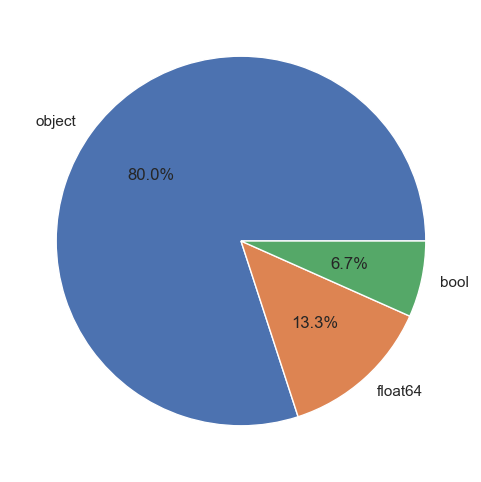

In [16]:
labels = ["object", "float64", "bool"]
fig, ax = plt.subplots(1,1, figsize = (20, 6))
ax.pie(df.dtypes.value_counts(normalize=True), labels=labels, autopct='%1.1f%%')
del labels;

In [17]:
df.nunique()

uniq_id                    1050
crawl_timestamp             149
product_url                1050
product_name               1050
product_category_tree       642
pid                        1050
retail_price                354
discounted_price            424
image                      1050
is_FK_Advantage_product       2
description                1050
product_rating               27
overall_rating               27
brand                       490
product_specifications      984
dtype: int64

### <a name="C33"><font color='teal'>3.3 Les valeurs manquantes et les doublons du dataframes</font></a> 

#### <font color='teal'>3.3.a Analyse des doublons du dataframes</font>

In [18]:
print("Il y a {} lignes dupliquées".format(df.duplicated().sum()))

Il y a 0 lignes dupliquées


In [19]:
print("Il y a {} lignes dupliquées".format( df.drop(columns="uniq_id").duplicated().sum() ))
print("Il y a {} clés primaires dupliquées".format( df["uniq_id"].duplicated().sum() ))

Il y a 0 lignes dupliquées
Il y a 0 clés primaires dupliquées


In [20]:
for col in df.columns:
    n = df.duplicated(subset=col).sum()
    print(f"col : {col} -> duplicated : {n}" )

col : uniq_id -> duplicated : 0
col : crawl_timestamp -> duplicated : 901
col : product_url -> duplicated : 0
col : product_name -> duplicated : 0
col : product_category_tree -> duplicated : 408
col : pid -> duplicated : 0
col : retail_price -> duplicated : 695
col : discounted_price -> duplicated : 625
col : image -> duplicated : 0
col : is_FK_Advantage_product -> duplicated : 1048
col : description -> duplicated : 0
col : product_rating -> duplicated : 1023
col : overall_rating -> duplicated : 1023
col : brand -> duplicated : 559
col : product_specifications -> duplicated : 65


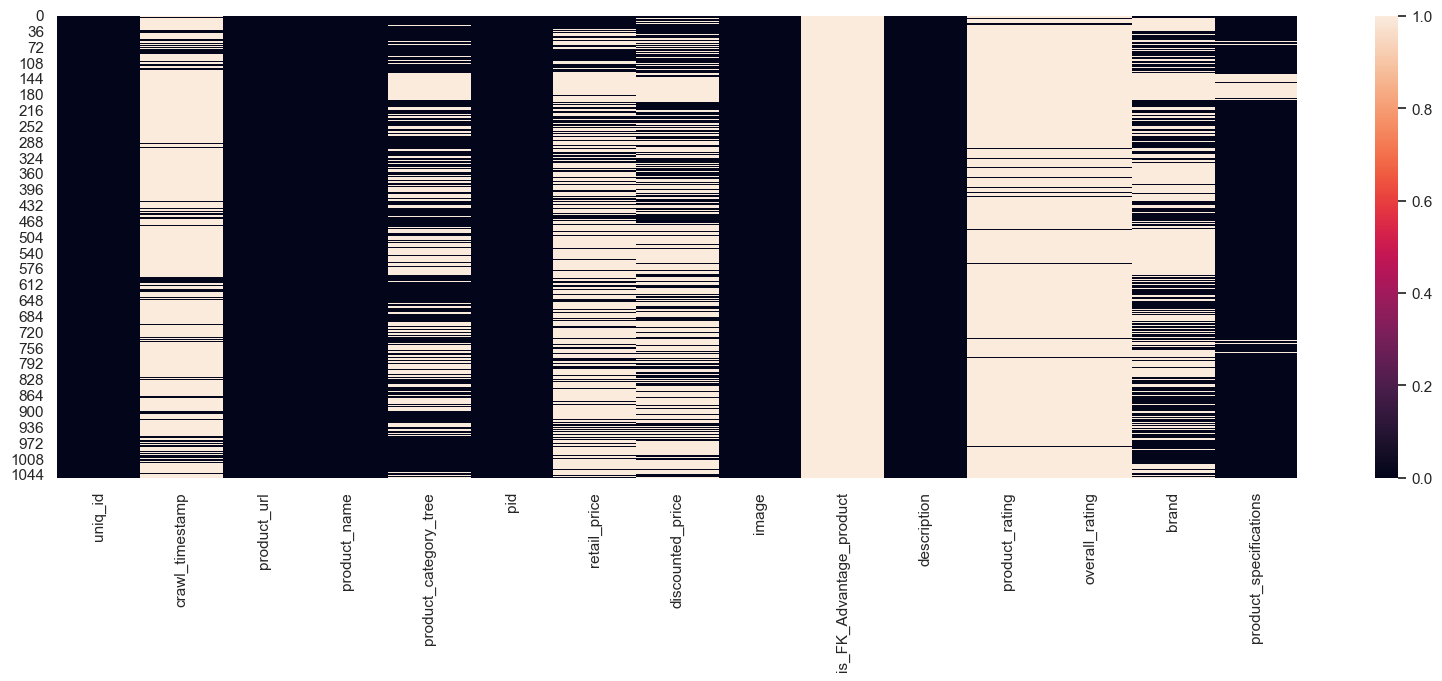

In [21]:
fig, ax = plt.subplots(1,1, figsize = (20, 6))
sns.heatmap( df.apply(lambda x: x.duplicated()) );

#### <font color='teal'>3.3.b Analyse et Traitement des valeurs manquantes du dataframes</font>

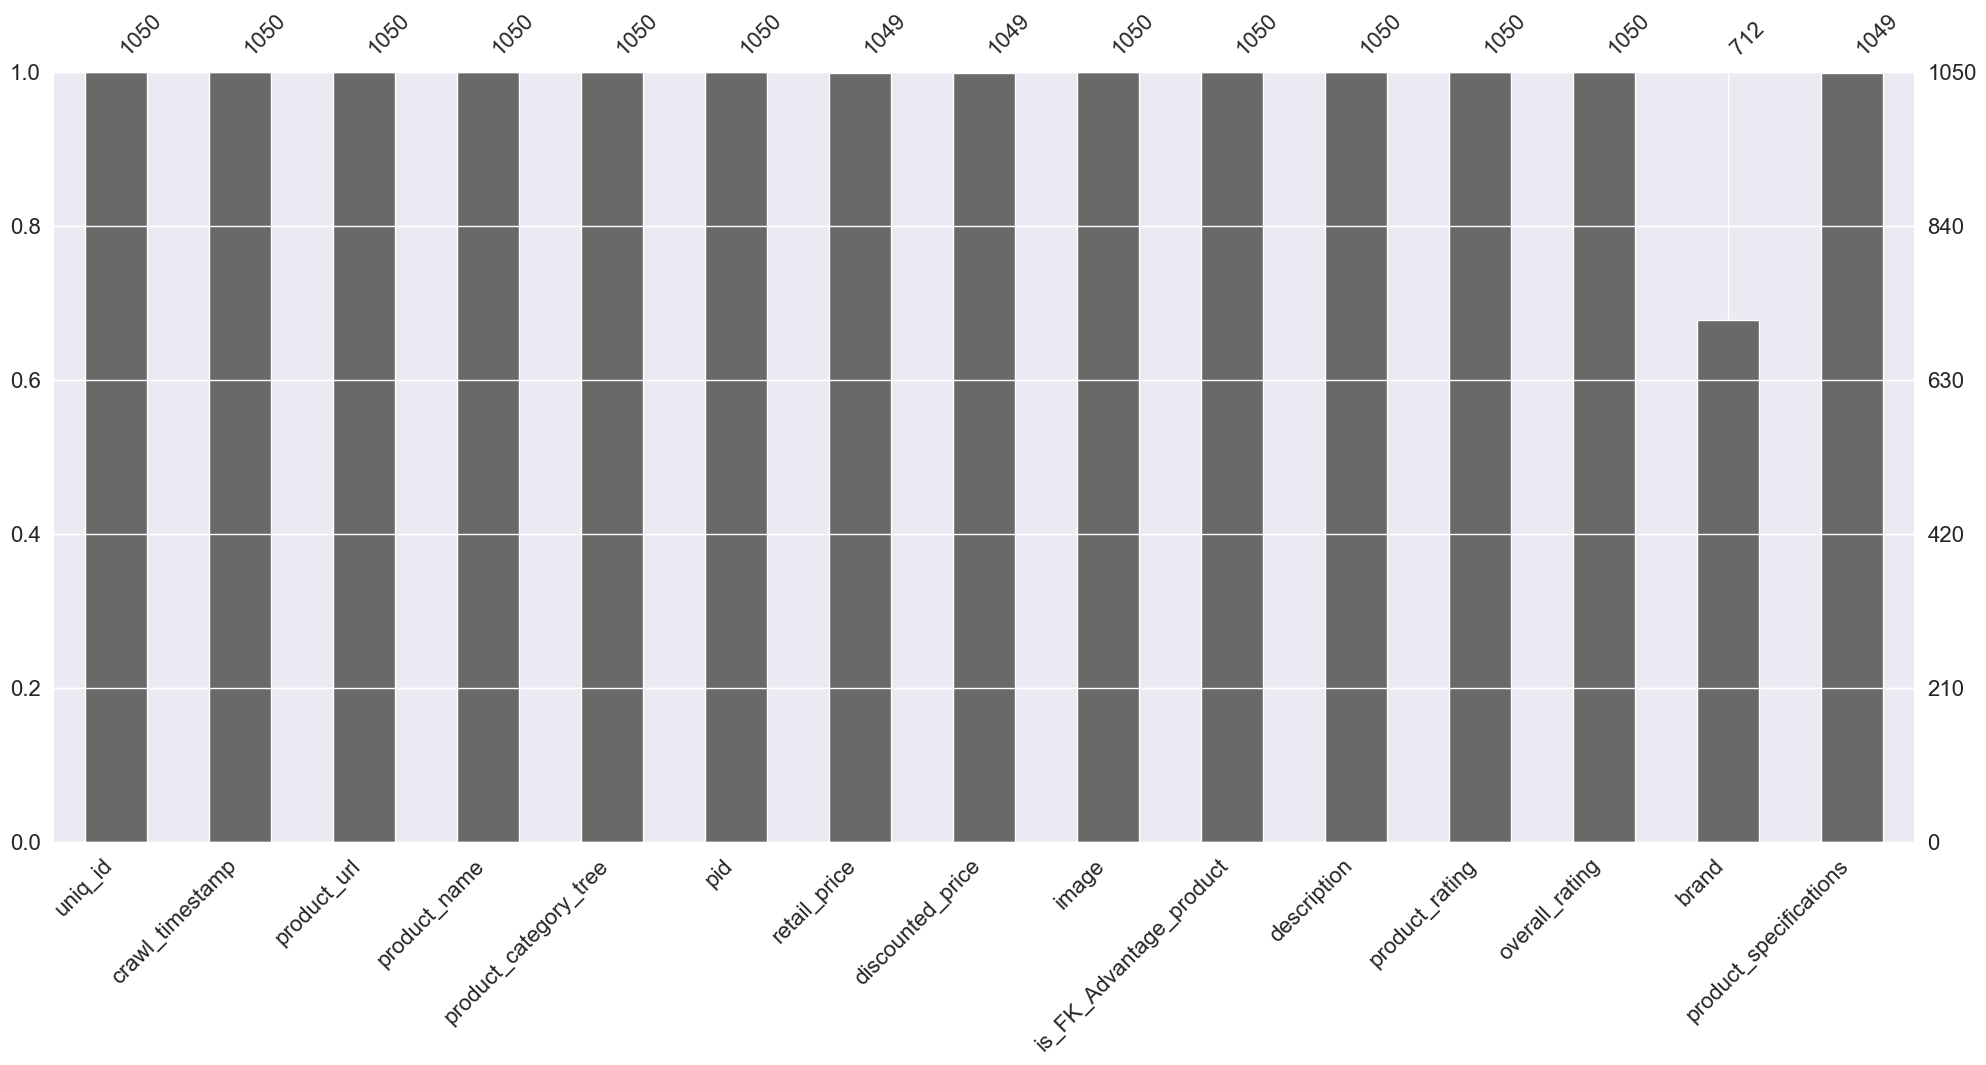

In [22]:
#les variables misc_data
import missingno as msno
msno.bar(df);

In [23]:
def compute_nb_mising_values(data):
    """
    Cree un dataframe pandas qui contient le nombre de valeurs par colonnes de l'argument data
    """
    valeurs = {}
    
    for col in data.columns:
        valeurs[col] = []
        valeurs[col].append(round((data[col].notna().sum()/data.shape[0])*100,2))
        valeurs[col].append(data[col].isna().sum())
        
    return pd.DataFrame.from_dict(data=valeurs, orient='index',
                                  columns = ["Taux de valeurs non nulles", "Nombre de valeurs manquantes"]
                                 ).sort_values(by="Nombre de valeurs manquantes",ascending=True)

In [24]:
compute_nb_mising_values(df)

,Taux de valeurs non nulles,Nombre de valeurs manquantes
uniq_id,100.00,0
crawl_timestamp,100.00,0
product_url,100.00,0
product_name,100.00,0
product_category_tree,100.00,0
pid,100.00,0
image,100.00,0
is_FK_Advantage_product,100.00,0
description,100.00,0
product_rating,100.00,0


In [25]:
def drop_NA_columns(data,p):
    '''
    Select features who have more than p% if p<1 na value   
    Select feature contains more than p na value if p>1
    '''
    feature = []
    if p > 1 and p < 100:
        na_df = data.columns[data.isna().sum() > int(p)]
    
    if p <= 1 and p > 0:
        na_df = data.columns[data.isna().sum()/data.shape[0] > p]
    
    return(na_df)

In [26]:
drop_NA_columns(df,p=0.5)

Index([], dtype='object')

#### <div class="alert alert-info"><font color='teal'> Suppression des colonnes dont plus de ...% des valeurs sont manquantes </font></div>

In [27]:
def drop_NA_columns(data,p):
    '''
    Select features who have more than p% if p<1 na value   
    Select feature contains more than p na value if p>1
    '''
    feature = []
    if p > 1 and p < 100:
        na_df = data.columns[data.isna().sum() > int(p)]
    
    if p <= 1 and p > 0:
        na_df = data.columns[data.isna().sum()/data.shape[0] > p]
    
    return(na_df)

In [28]:
drop_NA_columns(df,p=0.5)

Index([], dtype='object')

In [29]:
col_to_drop = drop_NA_columns(df,p=0.5)
df.shape
del col_to_drop                

### <a name="C34"><font color='teal'>3.4 Data inspections</font></a> 

In [30]:
df.describe()

,retail_price,discounted_price
count,1049.000000,1049.000000
mean,2186.197331,1584.527169
std,7639.229411,7475.099680
min,35.000000,35.000000
25%,555.000000,340.000000
50%,999.000000,600.000000
75%,1999.000000,1199.000000
max,201000.000000,201000.000000


In [31]:
df.describe(exclude = [np.number]) #/include = [objet]/["category"]

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
count,1050,1050,1050,1050,1050,1050,1050,1050,1050,1050,1050,712,1049
unique,1050,149,1050,1050,642,1050,1050,2,1050,27,27,490,984
top,55b85ea15a1536d46b7190ad6fff8ce7,2015-12-01 12:40:44 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Bed Linen >> Blankets, Qu...",CRNEG7BKMFFYHQ8Z,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,PRINT SHAPES,"{""product_specification""=>[{""key""=>""Type"", ""va..."
freq,1,150,1,1,56,1,1,993,1,889,889,11,22


### <a name="C35"><font color='teal'>3.5 Data Visualisation Multivariée</font></a> 

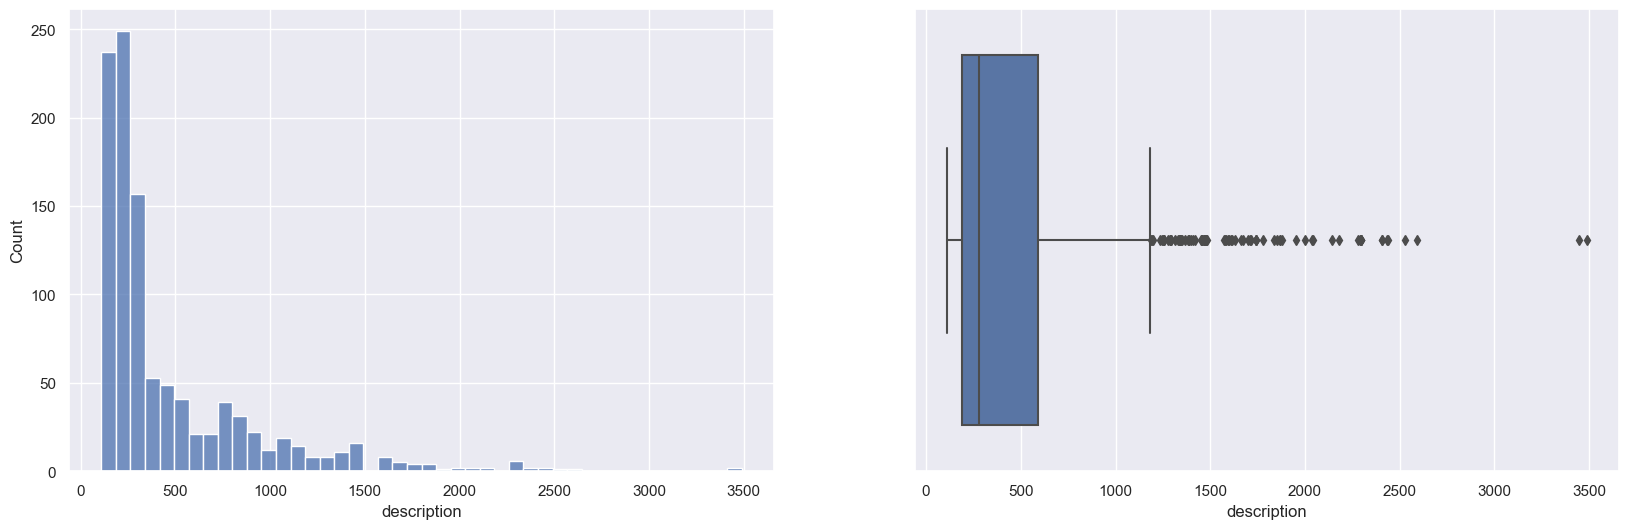

In [32]:
# Description
fig, ax = plt.subplots(1,2, figsize = (20, 6))
sns.histplot(df.description.str.len(),ax= ax[0])
sns.boxplot(x = df.description.str.len(),ax= ax[1]);

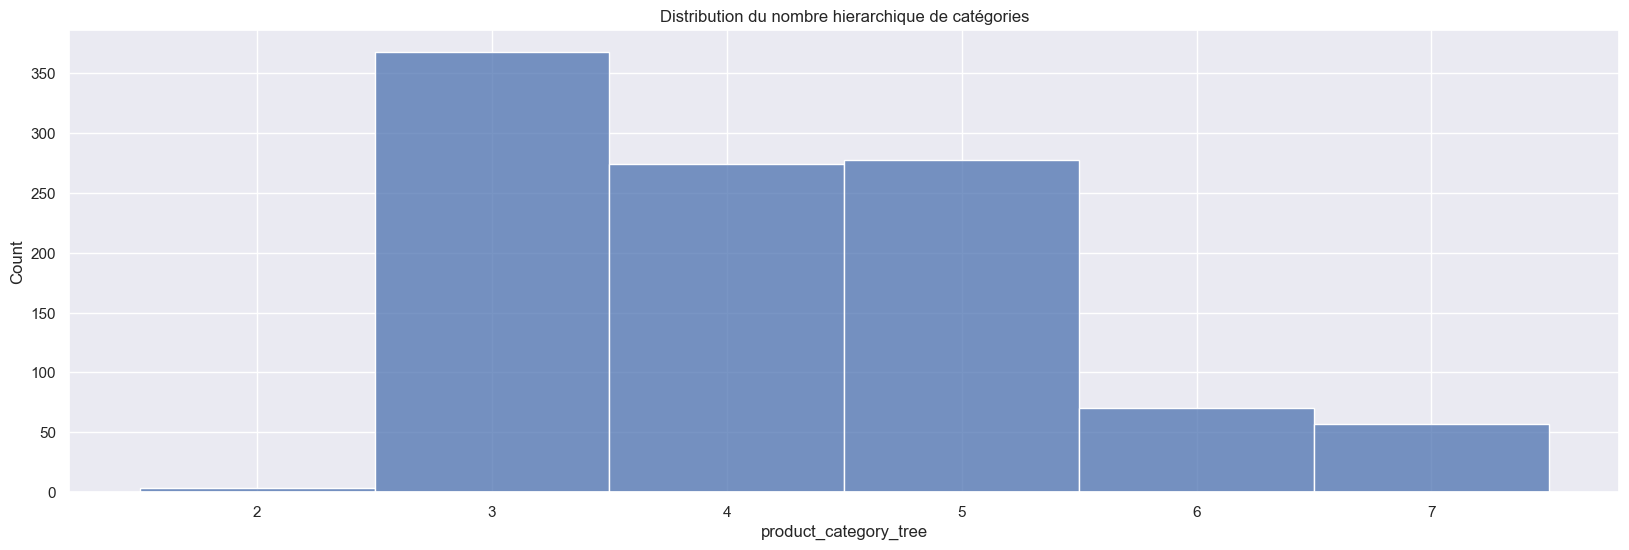

In [33]:
# product_category_tree
fig, ax = plt.subplots(1,1, figsize = (20, 6))
sns.histplot(df.product_category_tree.str.split(' >> ').apply(len),ax = ax,discrete=True)
ax.set_title("Distribution du nombre hierarchique de catégories");

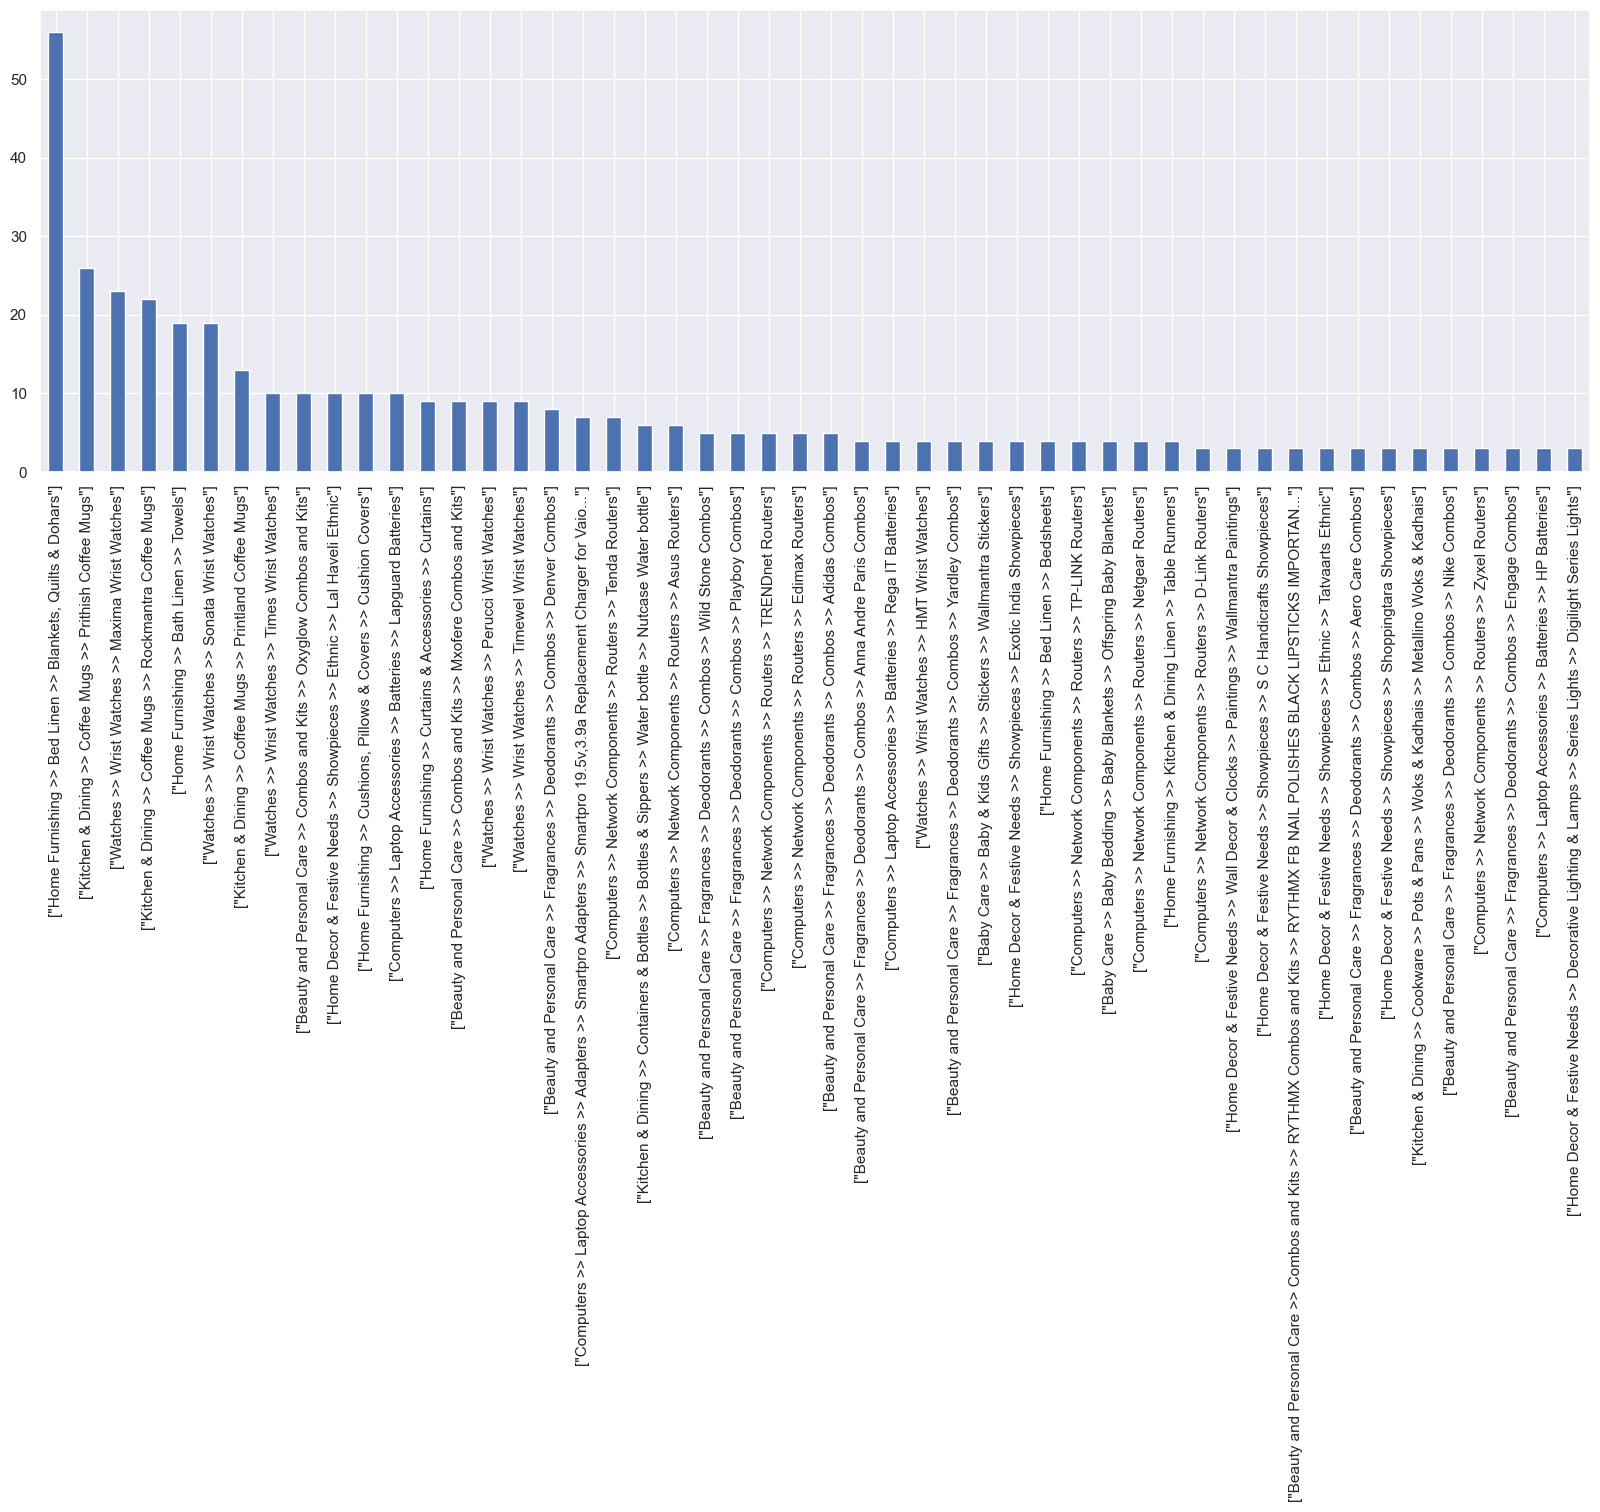

In [34]:
# product_category_tree
fig, ax = plt.subplots(1,1, figsize = (20, 6))
df.product_category_tree.value_counts().head(50).plot(kind='bar');

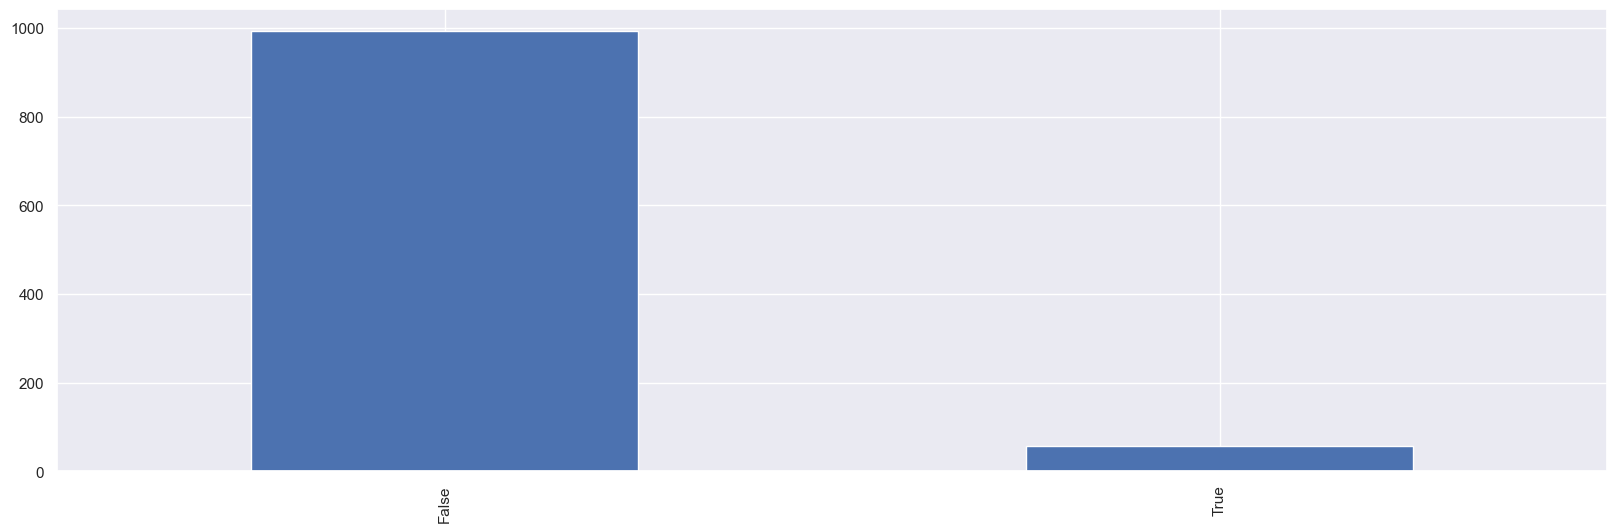

In [35]:
# is_FK_Advantage_product
fig, ax = plt.subplots(1,1, figsize = (20, 6))
df.is_FK_Advantage_product.value_counts().plot(kind='bar');

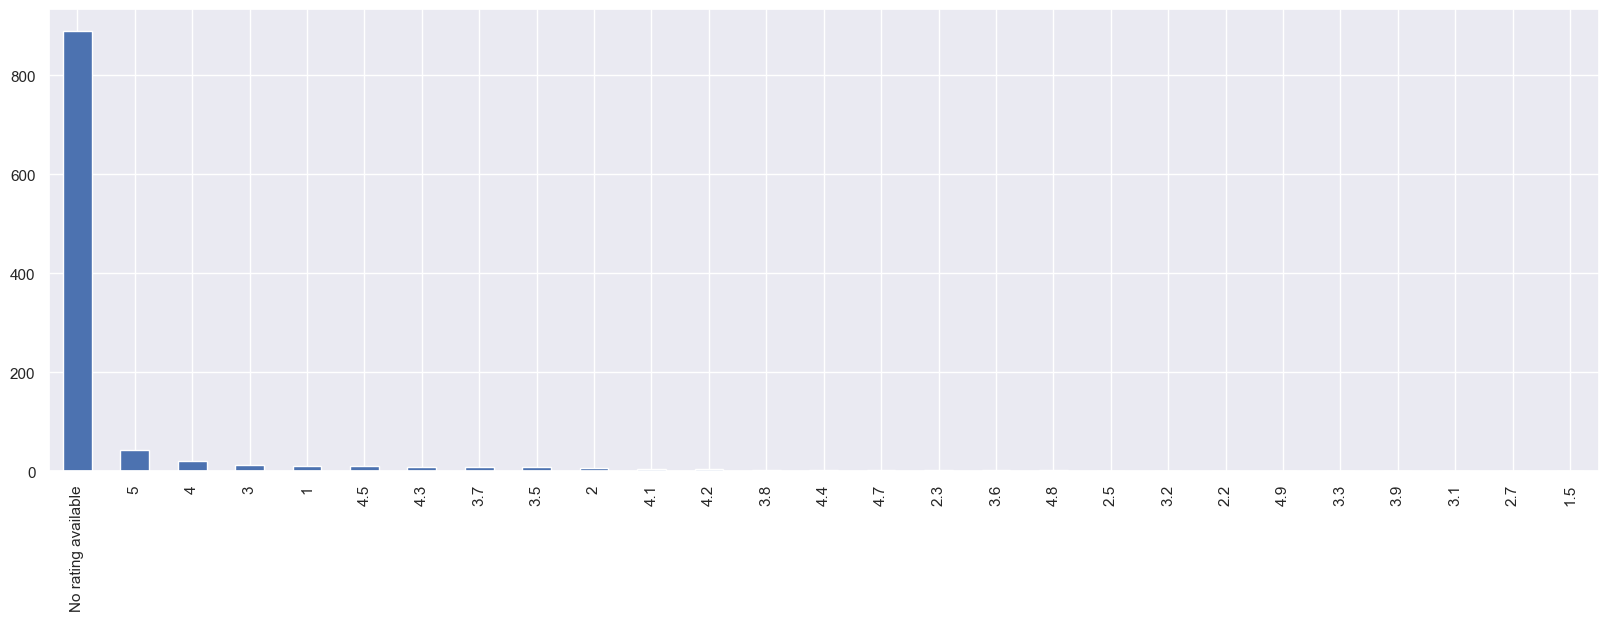

In [36]:
# product_rating
fig, ax = plt.subplots(1,1, figsize = (20, 6))
df.product_rating.value_counts().plot(kind='bar');

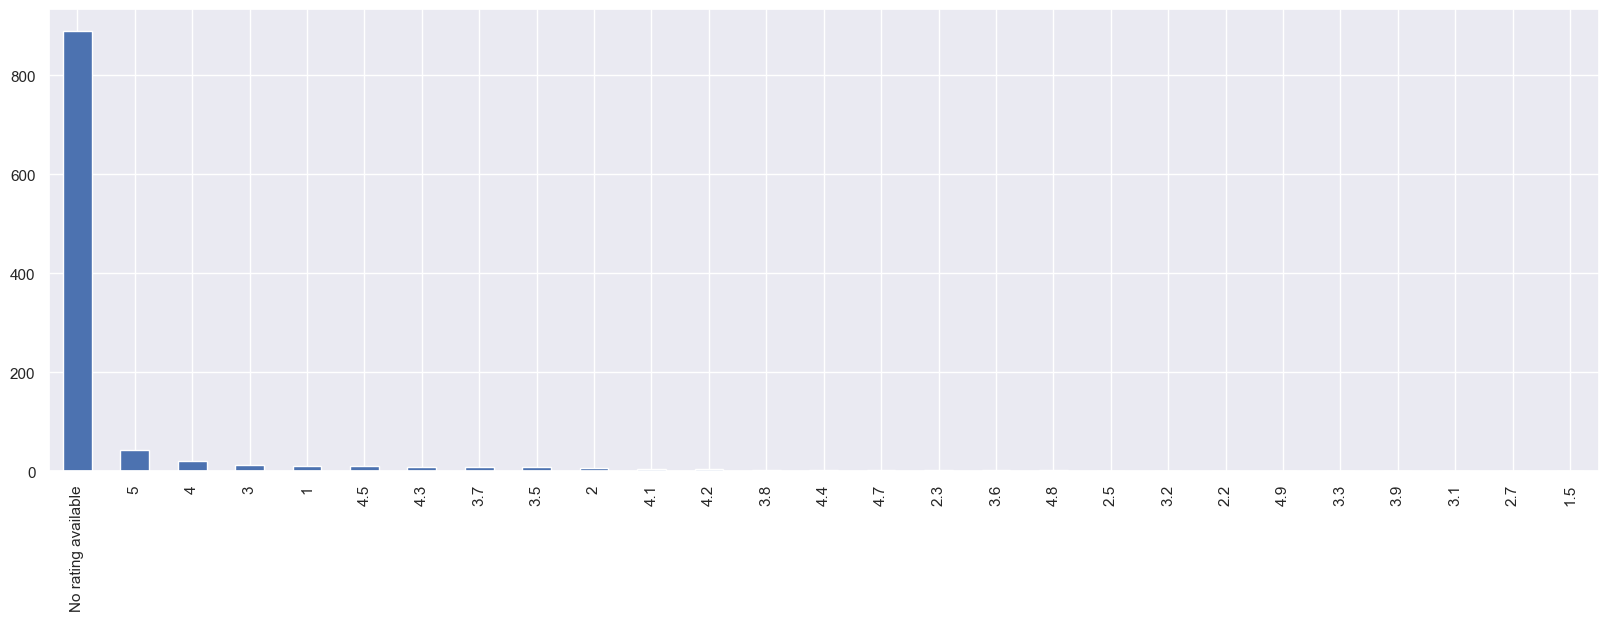

In [37]:
# overall_rating
fig, ax = plt.subplots(1,1, figsize = (20, 6))
df.overall_rating.value_counts().plot(kind='bar');

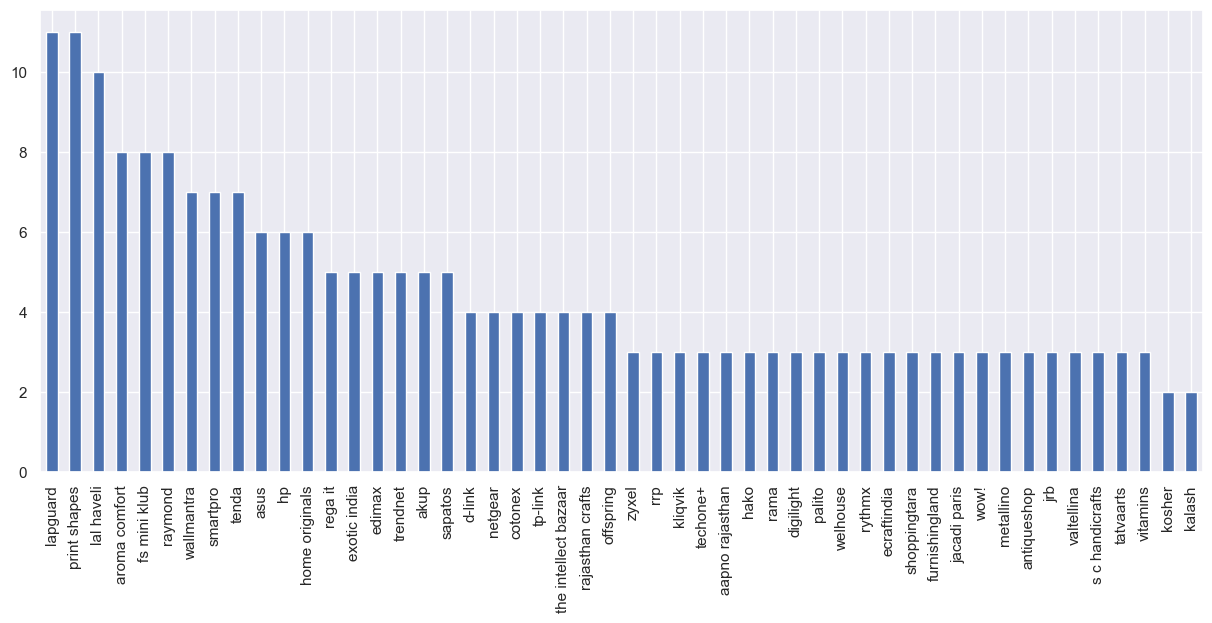

In [38]:
# brand
fig, ax = plt.subplots(1,1, figsize = (15, 6))
df.brand.str.lower().value_counts().head(50).plot(kind='bar');

### <a name="C36"><font color='teal'>3.6 Cleaning </font></a> 

#### <font color='teal'>3.6.a Select Columns</font>

In [39]:
df.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')

In [40]:
cols = ['uniq_id', 'product_category_tree', 'description', 'pid','product_url','product_specifications','image']
df = df[cols]
df.head()
del cols

In [41]:
print("Il y a {} lignes dupliquées".format(df.duplicated().sum()))

Il y a 0 lignes dupliquées


In [42]:
print("Il y a {} lignes dupliquées".format( df.drop(columns="uniq_id").duplicated().sum() ))
print("Il y a {} clés primaires dupliquées".format( df["uniq_id"].duplicated().sum() ))

Il y a 0 lignes dupliquées
Il y a 0 clés primaires dupliquées


#### <font color='teal'>3.6.b Correction colonnes</font>

In [43]:
#url

In [44]:
df.product_url.sample().values

array(['http://www.flipkart.com/kalash-kadhai-11-5-l/p/itme62xbycdzrzpz?pid=PTPE62XBRHPBQDZS'],
      dtype=object)

In [45]:
# Extraction Info des URL
# pattern 1 : 'http://www.flipkart.com/' (prefix)
# pattern 2 : '\\/p\\/.+$' (suffix)

pat1 = 'http://www.flipkart.com/'
pat2 = '\\/p\\/.+$'
df['_url_info'] = df.product_url.apply(lambda x: re.sub(pat1+'|'+pat2,'',x.lower() ) )
del pat1, pat2

In [46]:
for idx in df['uniq_id'].sample(5):
    print('id :',idx,' | col :',df.loc[df['uniq_id']==idx,'_url_info'].values,'| pid : ',df.loc[df['uniq_id']==idx,'product_url'].values[0].lower(),'\n')

id : 18bd9b88e23b82fd19f8ab0c9cad6a1a  | col : ['diviniti-dg-royal-ornamental-size-4-gurunanak-religious-wall-hanging-showpiece-30-5-cm'] | pid :  http://www.flipkart.com/diviniti-dg-royal-ornamental-size-4-gurunanak-religious-wall-hanging-showpiece-30-5-cm/p/itmebbwhhgcsndbu?pid=shiebbwhsyhsvv4u 

id : f01ff0a82401117e9da22dd680fd2f36  | col : ['rockmantra-old-art-ceramic-mug'] | pid :  http://www.flipkart.com/rockmantra-old-art-ceramic-mug/p/itmeaggkugbfffum?pid=mugeaggkcdcuhpyq 

id : 894904e26516d491bf1c7711fe800e78  | col : ['only-kidz-20600-digital-watch-boys-girls'] | pid :  http://www.flipkart.com/only-kidz-20600-digital-watch-boys-girls/p/itmdwabswftyvdgk?pid=watdwabrfcwt2dd3 

id : 4946e2411d24801b9e8f7dbe97ab1b93  | col : ['eshoppee-shiv-face-antique-color-brass-idol-showpiece-8-cm'] | pid :  http://www.flipkart.com/eshoppee-shiv-face-antique-color-brass-idol-showpiece-8-cm/p/itmebczqycyevpxf?pid=shiebczqnhtsfpjg 

id : 73503fe89ea77420a598f4a1019e5b6d  | col : ['prithish-ps

### category

In [47]:
df.product_category_tree.sample(5)

908    ["Baby Care >> Infant Wear >> Baby Boys' Cloth...
419    ["Computers >> Network Components >> Routers >...
680    ["Kitchen & Dining >> Lighting >> Bulbs >> Soy...
162    ["Kitchen & Dining >> Coffee Mugs >> Prithish ...
599    ["Baby Care >> Infant Wear >> Baby Girls' Clot...
Name: product_category_tree, dtype: object

In [48]:
df.product_category_tree.str.split(">>",expand = True).isna().sum()/1050

0    0.000000
1    0.000000
2    0.002857
3    0.353333
4    0.614286
5    0.879048
6    0.945714
dtype: float64

In [49]:
# Conserver les 3 premiers colonnes

In [50]:
# extraction des categories de product_category_tree
df[['cat_1', 'cat_2', 'cat_3', 'cat_4', 'cat_5', 'cat_6', 'cat_7']] = df.product_category_tree\
.apply(lambda x: re.sub('^\\[\\"','',x.lower()) )\
.str.split(" >> ",expand = True)

df.drop(columns=['cat_4', 'cat_5', 'cat_6', 'cat_7'], inplace = True)

In [51]:
df[['image','product_category_tree','cat_1', 'cat_2', 'cat_3']].head(5)

,image,product_category_tree,cat_1,cat_2,cat_3
0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,"[""Home Furnishing >> Curtains & Accessories >>...",home furnishing,curtains & accessories,curtains
1,7b72c92c2f6c40268628ec5f14c6d590.jpg,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",baby care,baby bath & skin,baby bath towels
2,64d5d4a258243731dc7bbb1eef49ad74.jpg,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",baby care,baby bath & skin,baby bath towels
3,d4684dcdc759dd9cdf41504698d737d8.jpg,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",home furnishing,bed linen,bedsheets
4,6325b6870c54cd47be6ebfbffa620ec7.jpg,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",home furnishing,bed linen,bedsheets


In [52]:
# Supprimer la colonne image
# df.drop(columns='image',inplace=True)

In [53]:
df.nunique()

uniq_id                   1050
product_category_tree      642
description               1050
pid                       1050
product_url               1050
product_specifications     984
image                     1050
_url_info                 1048
cat_1                        7
cat_2                       63
cat_3                      244
dtype: int64

In [54]:
df.cat_1.value_counts()

home furnishing               150
baby care                     150
watches                       150
home decor & festive needs    150
kitchen & dining              150
beauty and personal care      150
computers                     150
Name: cat_1, dtype: int64

In [55]:
pd.set_option('display.max_rows', 100)
df.cat_2.value_counts().T

wrist watches                        149
laptop accessories                    87
infant wear                           84
coffee mugs                           74
showpieces                            71
bed linen                             65
fragrances                            65
network components                    49
cookware                              27
table decor & handicrafts             27
combos and kits                       24
wall decor & clocks                   22
bath linen                            21
curtains & accessories                19
makeup                                18
baby bedding                          15
body and skin care                    15
baby & kids gifts                     15
baby bath & skin                      14
kitchen tools                         14
kitchen & dining linen                14
decorative lighting & lamps           14
containers & bottles                  13
cushions, pillows & covers            13
hair care       

In [56]:
df.cat_2.value_counts().T

wrist watches                        149
laptop accessories                    87
infant wear                           84
coffee mugs                           74
showpieces                            71
bed linen                             65
fragrances                            65
network components                    49
cookware                              27
table decor & handicrafts             27
combos and kits                       24
wall decor & clocks                   22
bath linen                            21
curtains & accessories                19
makeup                                18
baby bedding                          15
body and skin care                    15
baby & kids gifts                     15
baby bath & skin                      14
kitchen tools                         14
kitchen & dining linen                14
decorative lighting & lamps           14
containers & bottles                  13
cushions, pillows & covers            13
hair care       

Text(0.5, 1.0, 'Histogramme du nombre de produit dans chaque classe \n de la categorie 1')

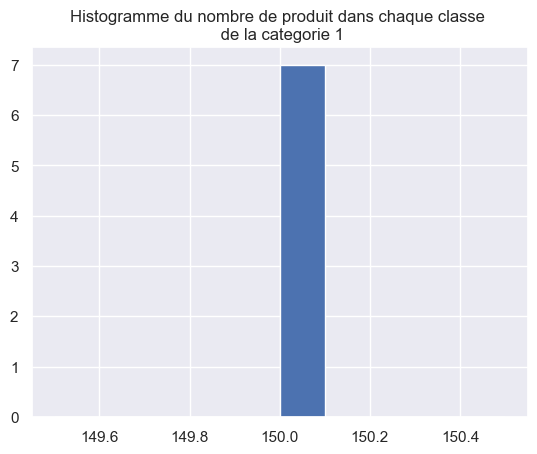

In [57]:
df.cat_1.value_counts().T.hist()
plt.title('Histogramme du nombre de produit dans chaque classe \n de la categorie 1')

Text(0.5, 1.0, 'Histogramme du nombre de produit dans chaque classe \n de la categorie 2')

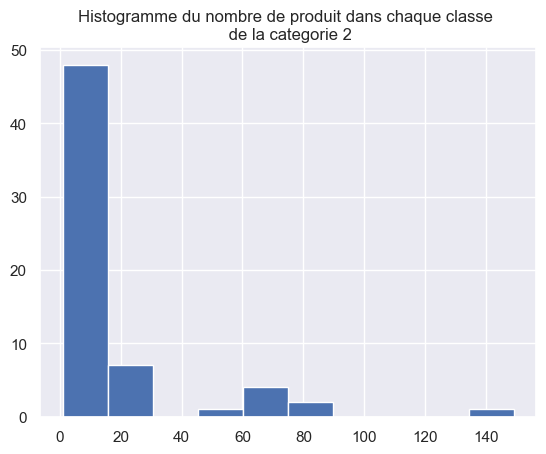

In [58]:
df.cat_2.value_counts().T.hist()
plt.title('Histogramme du nombre de produit dans chaque classe \n de la categorie 2')

Text(0.5, 1.0, 'Histogramme du nombre de produit dans chaque classe \n de la categorie 3')

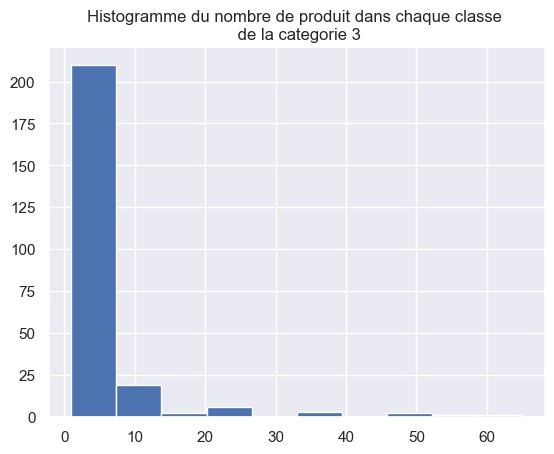

In [59]:
df.cat_3.value_counts().T.hist()
plt.title('Histogramme du nombre de produit dans chaque classe \n de la categorie 3')

In [60]:
df.cat_1.nunique(),df.cat_2.nunique(),df.cat_3.nunique()

(7, 63, 244)

In [61]:
# Supprimer des colonnes cat_2 et cat_3 car trop de categories(classes) pour peu de echantillon par classes. 
# Risque d'overfitting

df.drop(columns=['cat_2','cat_3'],inplace=True)

In [62]:
# product_specifications

In [63]:
df.product_specifications.sample().values[0]

'{"product_specification"=>[{"key"=>"Brand", "value"=>"Onlinemaniya"}, {"key"=>"Type", "value"=>"Quilts and Comforters"}, {"key"=>"Hand Washable", "value"=>"No"}, {"key"=>"Model ID", "value"=>"Jaipuri Rajai"}, {"key"=>"Color", "value"=>"Multicolor"}, {"key"=>"Design", "value"=>"Circle Pattern on Front"}, {"key"=>"Machine Washable", "value"=>"No"}, {"key"=>"Suitable For", "value"=>"Stroller, Cribs"}, {"key"=>"Inner Material", "value"=>"100% Cotton"}, {"key"=>"Model Name", "value"=>"Jaipuri Rajai"}, {"key"=>"Ideal For", "value"=>"Girls"}, {"key"=>"Outer Material", "value"=>"Cotton"}, {"key"=>"Size", "value"=>"Single"}, {"key"=>"Weight", "value"=>"450 g"}, {"key"=>"Length", "value"=>"83 inch / 212 cm"}, {"key"=>"Width", "value"=>"53 inch / 135 cm"}, {"key"=>"Number of Contents in Sales Package", "value"=>"1"}, {"key"=>"Sales Package", "value"=>"1 Quilt"}]}'

In [64]:
# Nombre de valeurs manquantes pour cette variable
df.product_specifications.isna().sum()

1

In [65]:
#pat1 = 'ee' 
#pat2 = 'rr'
df['spec_clean'] = df.product_specifications.apply(lambda x: re.sub('\\{\\"product_specification\\"\\=\\>\\[\\{|\\}|\\{','',str(x) ).split(',') )
#del pat1, pat2

res = dict()

for idx in df['uniq_id']:
    #print(idx)
    dico = dict()
    for row in df.loc[df.uniq_id==idx,'spec_clean']:
        for w in row:
            #print(w.strip())
            
            if w.strip()[:5]=='"key"':
                key = re.sub('"key"=>|\\"','',w.strip())
            if w.strip()[:5]=='"valu':
                value = re.sub('"value"=>|\\"','',w.strip())
                dico[key] = value      
        #print('\n')
    res[idx] = dico
                
df_spec = pd.DataFrame.from_dict(res,orient='index')   
del res, w, row, idx, dico

In [66]:
df_spec.sample(5)

,Brand,Designed For,Type,Model Name,Model ID,Color,Length,Number of Contents in Sales Package,Sales Package,Material,...,Error Check,Memory Configuration,Memory Clock,Technology,Re-usable,Area of Use,Other Traits,Acid Free,Transfer Paper,Printed Text
bbb8cdc5406ff60ff06ff64630f2ca47,NaN,NaN,Digital,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20a06aad5f04727dd54bf13dd5923518,RandMshoppee,NaN,NaN,NaN,NaN,Black,NaN,NaN,1 shelf,MDF,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52c5fe837181962a7c1d5883bb9d7007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2abb35d6affd2796e664349a747bd302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6acca991d2353781779b866e4f96edd9,Home Originals,NaN,Blanket,Super Soft Blanket - 25,Super Soft Blanket - 25,Multicolor,94 inch / 240 cm,2,2 Blankets],NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


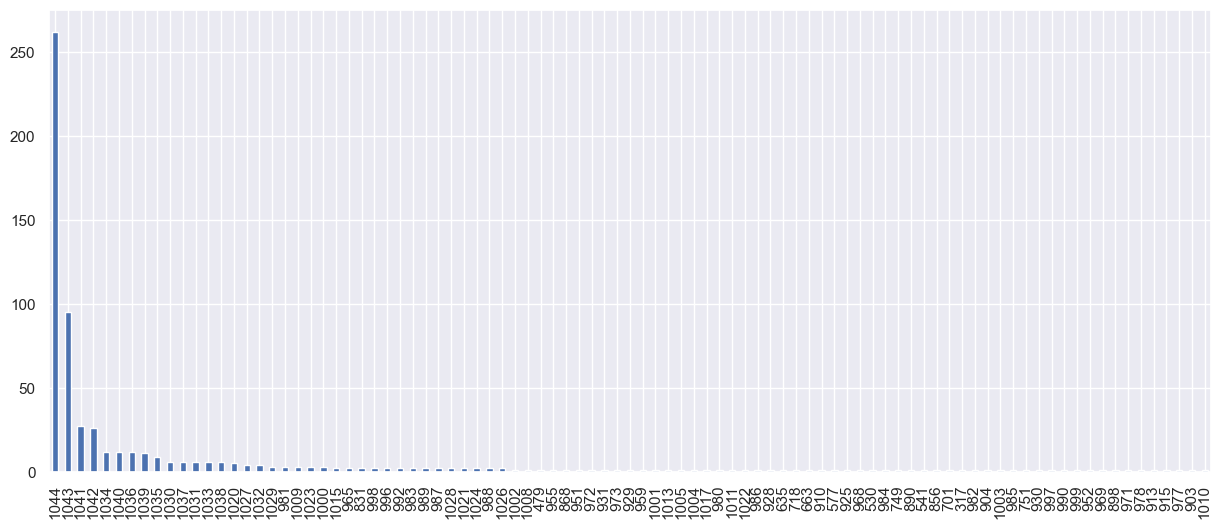

In [67]:
fig, ax = plt.subplots(1,1, figsize = (15, 6))
df_spec.isna().sum().value_counts().plot(kind='bar', ax=ax);

In [68]:
del df_spec

In [69]:
df.columns

Index(['uniq_id', 'product_category_tree', 'description', 'pid', 'product_url',
       'product_specifications', 'image', '_url_info', 'cat_1', 'spec_clean'],
      dtype='object')

In [70]:
df.drop(columns=['pid','product_url','product_specifications',
                'product_category_tree','spec_clean','_url_info'],inplace=True)

In [71]:
df.columns

Index(['uniq_id', 'description', 'image', 'cat_1'], dtype='object')

In [72]:
%whos

Variable                     Type                Data/Info
----------------------------------------------------------
AgglomerativeClustering      type                <class 'sklearn.cluster._<...>AgglomerativeClustering'>
Birch                        type                <class 'sklearn.cluster._birch.Birch'>
DBSCAN                       type                <class 'sklearn.cluster._dbscan.DBSCAN'>
EnglishStemmer               ABCMeta             <class 'nltk.stem.snowball.EnglishStemmer'>
Image                        module              <module 'PIL.Image' from <...>packages\\PIL\\Image.py'>
KMeans                       ABCMeta             <class 'sklearn.cluster._kmeans.KMeans'>
MeanShift                    type                <class 'sklearn.cluster._mean_shift.MeanShift'>
MiniBatchKMeans              ABCMeta             <class 'sklearn.cluster._kmeans.MiniBatchKMeans'>
PorterStemmer                ABCMeta             <class 'nltk.stem.porter.PorterStemmer'>
RegexpTokenizer          

### <a name="C37"><font color='teal'>3.7 Prétraitement </font></a> 

In [73]:
# Library NLTK
# from nltk.tokenize import word_tokenize
doc = df.description.str.lower()\
.str.replace('\t','')\
.str.replace('\n','')\
.str.replace('\r','')\
.sample().values[0]

tokensNLTK =  word_tokenize(doc)
np.array(tokensNLTK,dtype=object)

array(['maxima', '01433cmgy', 'gold', 'analog', 'watch', '-', 'for',
       'men', '-', 'buy', 'maxima', '01433cmgy', 'gold', 'analog',
       'watch', '-', 'for', 'men', '01433cmgy', 'online', 'at', 'rs.795',
       'in', 'india', 'only', 'at', 'flipkart.com', '.', 'water',
       'resistant', ',', 'brass', 'case', ',', 'golden', 'strap', ',',
       'round', 'dial', '-', 'great', 'discounts', ',', 'only', 'genuine',
       'products', ',', '30', 'day', 'replacement', 'guarantee', ',',
       'free', 'shipping', '.', 'cash', 'on', 'delivery', '!'],
      dtype=object)

In [74]:
# Obtenir la liste des modèles pré-entraînés disponible
!python -m spacy validate


| Loading compatibility table...
/ Loading compatibility table...
[+] Loaded compatibility table

================= Installed pipeline packages (spaCy v3.3.1) =================
[i] spaCy installation: C:\Users\eleor\anaconda3\lib\site-packages\spacy

NAME              SPACY                 VERSION      
en_core_web_sm    >=3.3.0.dev0,<3.4.0   3.3.0     [+]
fr_core_news_md   >=3.3.0.dev0,<3.4.0   3.3.0     [+]
fr_core_news_sm   >=3.3.0.dev0,<3.4.0   3.3.0     [+]



In [75]:
# Library Spacy
# Charger le modèle pré-entraîné en anglais
nlp = spacy.load("en_core_web_sm")

# Tokenisation avec Spacy
tokensSpacy = nlp(doc)
tokensSpacy
# Afficher chaque token
np.array(tokensSpacy,dtype = object)

array([maxima, 01433cmgy, gold, analog, watch,  , -, for, men, -, buy,
       maxima, 01433cmgy, gold, analog, watch,  , -, for, men,  ,
       01433cmgy, online, at, rs.795, in, india, only, at, flipkart.com,
       ., water, resistant, ,, brass, case, ,, golden, strap, ,, round,
       dial, -, great, discounts, ,, only, genuine, products, ,, 30, day,
       replacement, guarantee, ,, free, shipping, ., cash, on, delivery,
       !], dtype=object)

In [76]:
def display_tokens_info(tokens):
    """ display info about tokens"""
    print(f"nb tokens {len(tokens)}, nb tokens uniques {len(set(tokens))}" )
    print(tokens[:30])

In [77]:
# Nltk
display_tokens_info( tokensNLTK )

nb tokens 59, nb tokens uniques 40
['maxima', '01433cmgy', 'gold', 'analog', 'watch', '-', 'for', 'men', '-', 'buy', 'maxima', '01433cmgy', 'gold', 'analog', 'watch', '-', 'for', 'men', '01433cmgy', 'online', 'at', 'rs.795', 'in', 'india', 'only', 'at', 'flipkart.com', '.', 'water', 'resistant']


In [78]:
# Spacy
display_tokens_info( [tok.text for tok in tokensSpacy] )

nb tokens 62, nb tokens uniques 41
['maxima', '01433cmgy', 'gold', 'analog', 'watch', ' ', '-', 'for', 'men', '-', 'buy', 'maxima', '01433cmgy', 'gold', 'analog', 'watch', ' ', '-', 'for', 'men', ' ', '01433cmgy', 'online', 'at', 'rs.795', 'in', 'india', 'only', 'at', 'flipkart.com']


#### <b><font color='teal'> StopWords</font></b>

#####  <b><font color='teal'> telecharge la liste des stop words </br> puis merge ac la liste des mots les plus utilisés dans le corpus</font></b>

In [79]:
# Definir les Stop word NLTK
default = nltk.corpus.stopwords.words('english') # recuperer les stops words 'english' present par default dans la bibli
# de nltk

global stop_words
stop_words = set(default + stopwords.words('english'))
print('Nombre total de Stopword NLTK : ',len(stop_words),'\n')
print(stop_words)

Nombre total de Stopword NLTK :  179 

{'re', 'myself', 'mustn', 'that', 'at', 'other', 'such', 'aren', 't', 'you', 'because', 'themselves', 'up', "don't", "doesn't", 'this', 'does', 'once', 'same', "aren't", "it's", 'did', "you'd", "you've", 'shouldn', 'i', 'below', 'will', 'on', 'couldn', 'above', 'between', 'herself', "mightn't", 'any', 'while', 'himself', 'against', 'be', 'should', 'd', 'yourselves', 'didn', 'own', 'needn', 'just', 'these', 'its', 'my', 'so', 'but', 'further', 'all', 'being', 'who', 'hadn', 'doesn', "mustn't", 'most', 'don', 'yourself', 'do', 'a', 'or', "she's", 'as', 'having', 'from', "wouldn't", 'not', 'theirs', 'itself', 'me', 'shan', 'why', 'by', 'mightn', "hadn't", 'had', "won't", 'some', 'them', 'hasn', 'she', 've', "hasn't", 'for', 'can', 'with', 'haven', "shouldn't", 'ours', 'very', 'when', 'nor', "didn't", "isn't", "shan't", 'was', 'have', 'are', 'doing', 'he', 'were', 'how', 'the', 'has', 'll', 'to', 'o', 'is', 'isn', 'now', 'there', 'an', 'their', 'whom'

In [80]:
# Definir les StopWord Spacy
stop_wordsSpacy = spacy.lang.en.stop_words.STOP_WORDS

print('Nombre total de Stopword Spacy : ',len(stop_wordsSpacy),'\n')
print(stop_wordsSpacy)

# as an alternative solution
#stop_wordsSpacy2 = nlp.Defaults.stop_words

#print('\n                    -------------------------------------------------------------------------------\n')
#print('Nombre total de Stopword Spacy : ',len(stop_wordsSpacy2),'\n')
#print(stop_wordsSpacy2)

Nombre total de Stopword Spacy :  326 

{'throughout', 'ever', 'other', 'such', 'otherwise', 'upon', 'make', 'did', 'i', 'perhaps', 'on', 'within', 'would', 'any', 'via', 'seems', 'against', 'own', 'just', '’ll', 'so', 'amongst', 'top', 'anywhere', 'us', "'s", 'yourself', 'or', 'from', 'three', 'not', 'still', 'me', 'across', 'thru', 'part', 'side', 'latterly', 'together', 'wherever', 'had', 'some', 'she', 'can', 'everywhere', 'someone', 'he', 'towards', 'ten', 'several', 'fifty', 'afterwards', 'to', 'now', 'onto', 'whom', 'into', 'before', 'it', 'our', 'seem', 'whoever', '‘re', 'your', 'somewhere', 'next', 'her', 'take', 'whether', 'down', 'whatever', 'many', 'except', 'almost', 'ourselves', 'anyone', 'also', 'hereupon', 'serious', 'his', 'no', 'call', '’d', '’ve', 're', '’m', 'fifteen', 'that', '’s', "'ve", 'hereafter', 'another', 'up', 'nine', 'could', 'this', 'does', 'once', 'same', 'never', 'either', 'although', 'made', 'between', 'nevertheless', 'front', 'well', 'my', 'being', 'r

In [81]:
# Stop_words NLTK
tokensNLTK = [w for w in tokensNLTK if w.lower() not in stop_words]
display_tokens_info(tokensNLTK)

nb tokens 51, nb tokens uniques 35
['maxima', '01433cmgy', 'gold', 'analog', 'watch', '-', 'men', '-', 'buy', 'maxima', '01433cmgy', 'gold', 'analog', 'watch', '-', 'men', '01433cmgy', 'online', 'rs.795', 'india', 'flipkart.com', '.', 'water', 'resistant', ',', 'brass', 'case', ',', 'golden', 'strap']


In [82]:
# an other tokenizer NLTK
# from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r"\w+") # alphanumeric (letters, numbers, regardless of case) plus underscore (_)
tokensNLTK2 = [w for w in tokenizer.tokenize(doc) if w.lower() not in stop_words]
display_tokens_info(tokensNLTK2)

nb tokens 40, nb tokens uniques 33
['maxima', '01433cmgy', 'gold', 'analog', 'watch', 'men', 'buy', 'maxima', '01433cmgy', 'gold', 'analog', 'watch', 'men', '01433cmgy', 'online', 'rs', '795', 'india', 'flipkart', 'com', 'water', 'resistant', 'brass', 'case', 'golden', 'strap', 'round', 'dial', 'great', 'discounts']


In [83]:
tokensSpacy = [word for word in tokensSpacy if word.text not in stop_wordsSpacy] 
display_tokens_info( [tok.text for tok in tokensSpacy] )

nb tokens 54, nb tokens uniques 36
['maxima', '01433cmgy', 'gold', 'analog', 'watch', ' ', '-', 'men', '-', 'buy', 'maxima', '01433cmgy', 'gold', 'analog', 'watch', ' ', '-', 'men', ' ', '01433cmgy', 'online', 'rs.795', 'india', 'flipkart.com', '.', 'water', 'resistant', ',', 'brass', 'case']


#### <b><font color='teal'> drop punctuation</font></b>

In [84]:
from string import punctuation
punctuations = list(punctuation)
print(punctuations)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


In [85]:
# drop punctuations NLTK
tokensNLTK = [w for w in tokensNLTK if w not in punctuations]
display_tokens_info(tokensNLTK)

nb tokens 38, nb tokens uniques 31
['maxima', '01433cmgy', 'gold', 'analog', 'watch', 'men', 'buy', 'maxima', '01433cmgy', 'gold', 'analog', 'watch', 'men', '01433cmgy', 'online', 'rs.795', 'india', 'flipkart.com', 'water', 'resistant', 'brass', 'case', 'golden', 'strap', 'round', 'dial', 'great', 'discounts', 'genuine', 'products']


In [86]:
# drop punctuations Spacy
tokensSpacy = [w for w in tokensSpacy if w.text not in punctuations]
display_tokens_info([tok.text for tok in tokensSpacy])

nb tokens 41, nb tokens uniques 32
['maxima', '01433cmgy', 'gold', 'analog', 'watch', ' ', 'men', 'buy', 'maxima', '01433cmgy', 'gold', 'analog', 'watch', ' ', 'men', ' ', '01433cmgy', 'online', 'rs.795', 'india', 'flipkart.com', 'water', 'resistant', 'brass', 'case', 'golden', 'strap', 'round', 'dial', 'great']


#### <b><font color='teal'> List rare tokens </font></b>

In [87]:
def list_rare_tokens(string, _tokenizer = None):
    """ Return the list of tokens rare  """

    # lower & tokenize
    raw_tokens_list = _tokenizer( string.lower() )
    
    # stopwords
    cleaned_tokens_list = [ w for w in raw_tokens_list if w not in stop_words]
    
    for k, v in corpora.iteritems():
        freq[k] = fq = nltk.FreqDist(v)
        stats[k] = {'total': len(v), 'unique': len(fq.keys())}
    return (freq, stats, corpora)

In [88]:
from nltk import FreqDist
raw_description = df.description.apply(lambda x: [w.lemma_.lower().strip() if w.lemma_ != "-PRON-" else w.lower_ for w in nlp(x)])
raw_description2 = ' '.join([' '.join([t for t in w]) for w in raw_description])

freqMots = FreqDist([ w for w in RegexpTokenizer(r"\w+").tokenize(raw_description2 ) ])
freqMots = pd.DataFrame.from_dict(freqMots,orient='index').sort_values(0,ascending=False)
freqMots.columns = ['Frequence']

del raw_description2

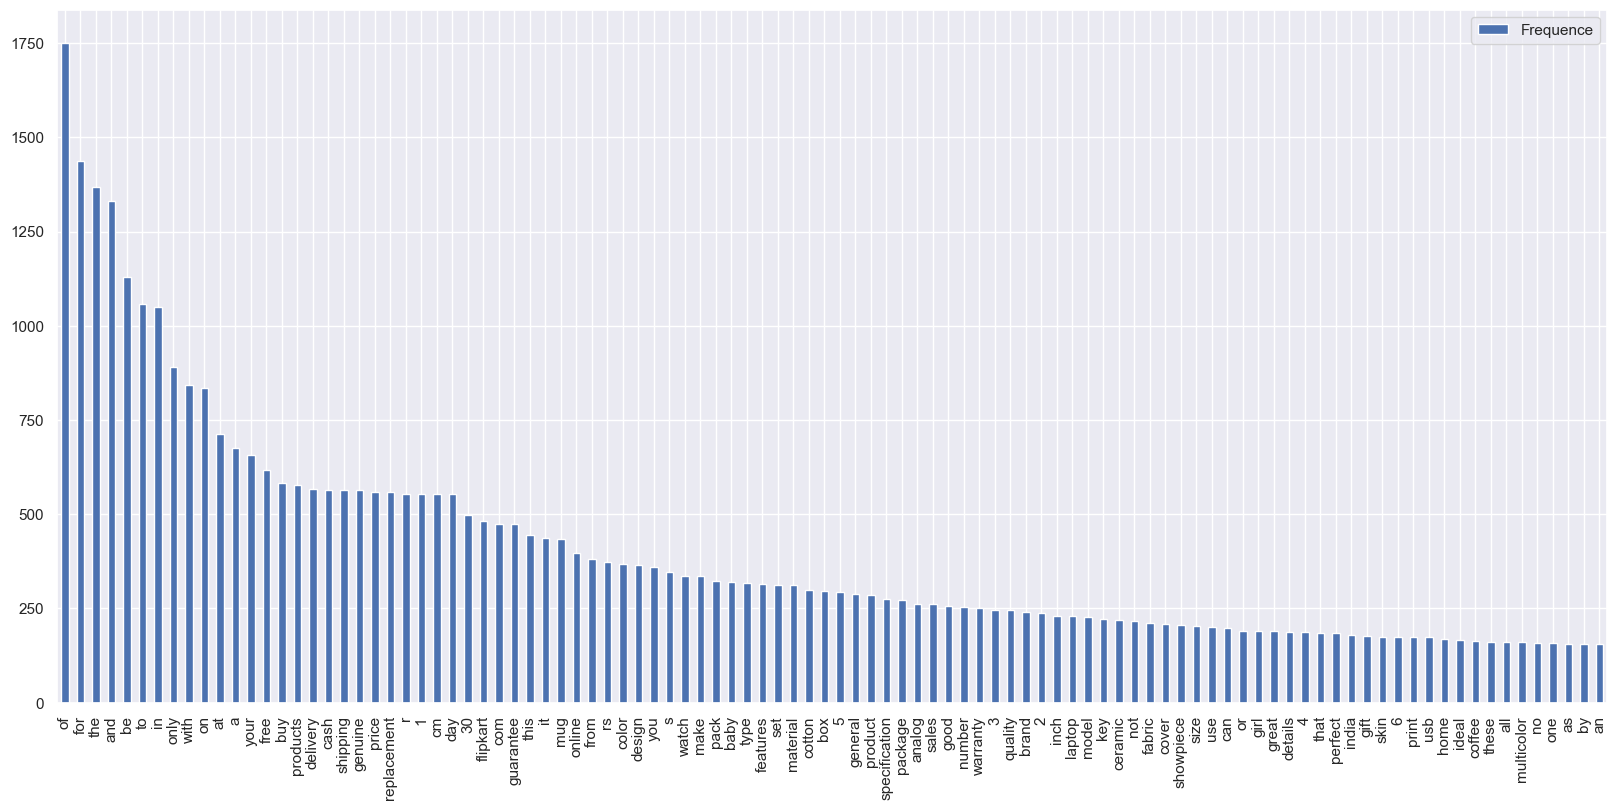

In [89]:
fig, ax = plt.subplots(1,1, figsize = (20, 9))
freqMots.head(100).plot(kind='bar',ax = ax);
# 400

In [90]:
freqMots.head(50)

,Frequence
of,1751
for,1436
the,1369
and,1332
be,1130
to,1058
in,1051
only,890
with,843
on,835


<div class="alert alert-info">
Les mots les plus frequents ne sont pas porteur d'information </Br>
La liste de mots triée par fréquence d'apparition à partir du mot "of" jusqu'au mot "guarantee" seront supprimés.</Br>
Les mots dont la fréquence est supérieur à <b><font color='red'>473!!!</font></b> </Br>
</div>

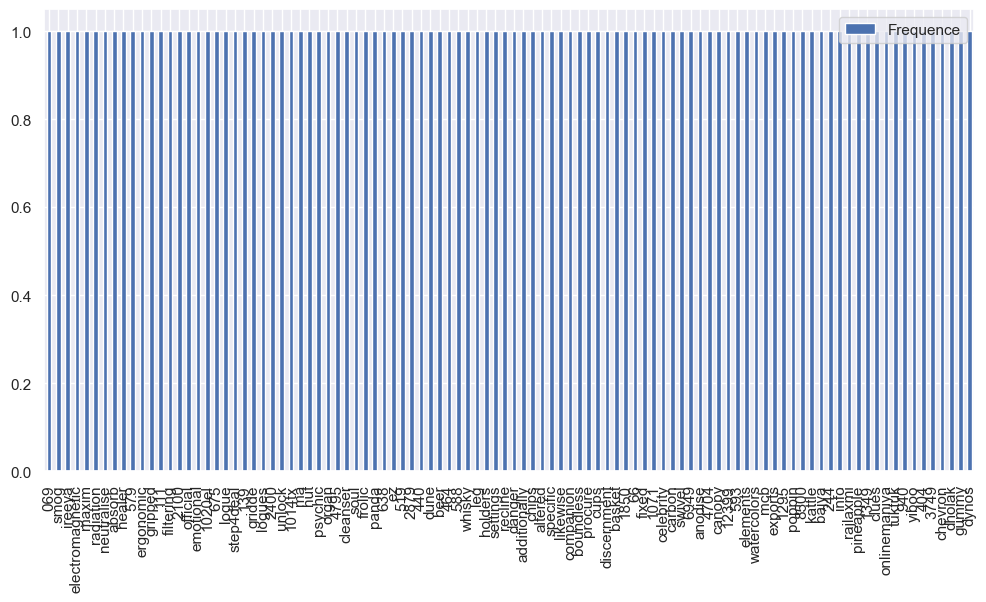

In [91]:
fig, ax = plt.subplots(1,1, figsize = (12, 6))
freqMots.tail(100).plot(kind='bar',ax = ax);
# 1

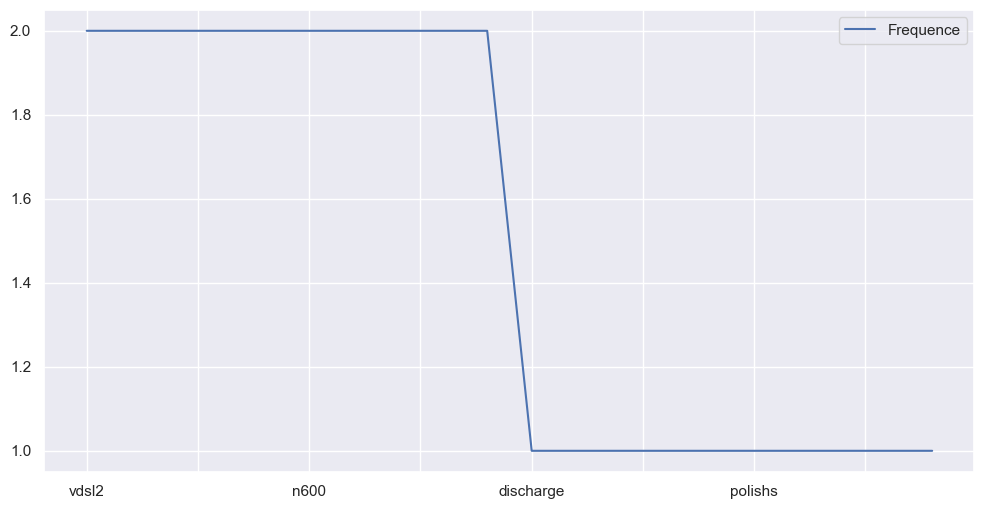

In [92]:
fig, ax = plt.subplots(1,1, figsize = (12, 6))
freqMots.tail(1815).head(20).plot(ax = ax);

In [93]:
freqMots.value_counts().sort_index().head(20)

Frequence
1            1805
2            1189
3             567
4             403
5             207
6             185
7             131
8             107
9              77
10             75
11             55
12             47
13             35
14             40
15             33
16             31
17             32
18             30
19             16
20             16
dtype: int64

<div class="alert alert-info">
Les mots les moins frequents ne porte trop peu d'information </Br>
Les mots dont la fréquence est inférieur à <b><font color='red'>3!!!</font></b> seront supprimées </Br>
</div>

In [94]:
####################################################################################
############################        Version NLTK        ############################
####################################################################################

## Add most freqency words to stop words 
stop_words.update(set(freqMots.loc[freqMots.Frequence>=473].index))

## Add rare words to list of stopwords
stop_words.update(set(freqMots.loc[freqMots.Frequence<=2].index) )

####################################################################################
############################      Version Spacy     ################################
####################################################################################

## Add most freqency words to stop words 
stop_wordsSpacy.update(set(freqMots.loc[freqMots.Frequence>473].index))

## Add rare words to list of stopwords
stop_wordsSpacy.update(set(freqMots.loc[freqMots.Frequence<=2].index) )

#### <b><font color='teal'> Cleaning Function </font></b>

In [95]:
# NLTK 1
raw_corpus = " ".join(df.description.values )
#display_tokens_info(word_tokenize(raw_corpus.lower()))

In [96]:
set([w for w in tokenizer.tokenize(raw_corpus) if not w.isascii() ])

{'décor'}

In [97]:
set([w for w in tokenizer.tokenize(raw_corpus) if not w.isalpha() ])

{'20564159',
 'H10089',
 'N31',
 '53',
 '235',
 '180',
 '2301',
 '05712LMLY',
 '22m',
 '222',
 '650',
 '582',
 '395',
 'CPGW087',
 '256',
 '780',
 '240KGT_PRINTED',
 'X6',
 '300gsm',
 '92',
 '78inch',
 '237MBB',
 'dv5',
 '01433CMGY',
 '829',
 'WS331c',
 'SOFAB002',
 '19431CMGY',
 '58',
 'MA897LLA',
 '449',
 'CC010',
 '429',
 '569',
 '419',
 '46',
 '03918CMLY',
 'MB003JA',
 '24742LMGY',
 '1900',
 '594',
 'ABKL_GRN_GRN_GRN',
 'sing569',
 '940',
 '11000026',
 '960',
 '1014tx',
 '190',
 '225',
 'DLST2020_WHITE_TBLUE_NAVY_PURPLE',
 '589',
 '5004_G',
 '24400',
 '771',
 'NOSWW001',
 '7016YM04',
 '94',
 '12x18',
 '213',
 'DAP1320',
 'N150',
 '01784BMLY',
 '09321CMGY',
 '6288ACL',
 '60c',
 '925',
 '7016YM09',
 '750',
 'NOSWW032',
 '411',
 'HGFVSIMSTMRN00158',
 '68',
 '1234',
 '7286WNA',
 '1LUNCH',
 'PMR1174',
 '1584',
 'F452',
 'SOS07',
 '23952LMLI',
 '237',
 '15x',
 '20c',
 '641',
 'VSCU261KV',
 '175057',
 '20981LMGI',
 '899',
 '0021',
 '166',
 '476',
 '949',
 'BL01',
 'ACI20160340',
 '14001',

In [98]:
# un seul token n'est pas considéré comme une suite de caractère ascci.
# On appique une correction manuelle décor => decor

# Beaucoup de tokens sont composés de caractères numériques.
# Certains de ces tokens sont porteurs d'information interressants 32g/11n/2G/240V/90Inch/350ml

#### <b><font color='teal'> Create function Cleaning Function</font></b> 

In [149]:
# Pre-Traitement description
df['description_clean'] = df.description.str.lower()\
.str.replace('\t','')\
.str.replace('\n','')\
.str.replace('\r','')\
.str.replace('décor','decor')

### Final Function

In [150]:
# Library Spacy
# Charger le modèle pré-entraîné en anglais
nlp = spacy.load("en_core_web_sm")

from string import punctuation
punctuations = list(punctuation)
#print(punctuations)

# Definir les StopWord Spacy
stop_words = spacy.lang.en.stop_words.STOP_WORDS
print('Nombre total de Stopword Spacy : ',len(stop_words),'\n')

## Add most freqency words to stop words
stop_words = set(list(stop_words) + freqMots.loc[freqMots.Frequence>351].index.tolist() )
#stop_words.update(set(freqMots.loc[freqMots.Frequence>351].index))

## Add rare words to list of stopwords
stop_words = set(list(stop_words) + freqMots.loc[freqMots.Frequence<=1].index.tolist() )
#stop_words.update(set(freqMots.loc[freqMots.Frequence<=1].index) )
print('Nombre total de Stopword Spacy après update: ',len(set(stop_words)),'\n')

def tokenize(sentence):
    sentence = nlp(sentence)
    # lemmatizing
    sentence = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in sentence ]
    # removing stop words
    sentence = [ word for word in sentence if word not in stop_words and word not in punctuations and len(str(word))>2 ]        
    return sentence

Nombre total de Stopword Spacy :  3307 

Nombre total de Stopword Spacy après update:  3314 



In [151]:
%%time
df['description_clean'] = df.description_clean.apply(lambda x: tokenize(nlp(x)))

CPU times: total: 22.6 s
Wall time: 24 s


In [119]:
idtest = np.random.choice(range(1050))

print(df['description'][idtest])
print('\n')
print( np.array(df['description_clean'][idtest]) )

Key Features of Eurospa Cotton Terry Face Towel Set Size: small Height: 9 inch GSM: 360,Eurospa Cotton Terry Face Towel Set (20 PIECE FACE TOWEL SET, Assorted) Price: Rs. 299 Eurospa brings to you an exclusively designed, 100% soft cotton towels of export quality. All our products have soft texture that takes care of your skin and gives you that enriched feeling you deserve. Eurospa has been exporting its bath towels to lot of renowned brands for last 10 years and is famous for its fine prints, absorbency, softness and durability. NOTE: Our product is 100% cotton, so it is susceptible to shrinkage. Product color may vary from the picture. Size may vary by ±3% WASH CARE: Wash in cold Water, Do not Iron, Do not Bleach, Flat dry, Wash before first use. SIZE- FACE TOWEL - 23 cms X 23 cms.,Specifications of Eurospa Cotton Terry Face Towel Set (20 PIECE FACE TOWEL SET, Assorted) Bath Towel Features Material Cotton Terry Design SHUVAM General Brand Eurospa GSM 360 Type Face Towel Set Model Na

In [120]:
df.loc[ df.description==df['description'][idtest] ]

,uniq_id,description,image,cat_1,description_clean
2,64d5d4a258243731dc7bbb1eef49ad74,Key Features of Eurospa Cotton Terry Face Towe...,64d5d4a258243731dc7bbb1eef49ad74.jpg,baby care,"[key, feature, eurospa, cotton, terry, face, t..."


### Perform parallele_apply function

In [157]:
def process_text_final_parallele2(doc, rejoin = False,stemm_or_lemm = ''):
    """ function of text processing with force_is_alpha
    
    positional arguments :
    -----------------------
    doc : str : the document (aka a text in str format) to process
    
    
    opt args : 
    -----------------------
    rejoin         :  bool :if True return a string else returnthe list of tokens
    min_len_word   :  int  : the mininmum length of words to not exclude
    force_is_alpha :  bool : if true, exclude all tokens with a numeric character
    force_is_ascii :  bool : if true, exclude all tokens with non ASCII character
    stemm_or_lemm  :  str  : if "lemm" do lemmentize else do stemmize
    language_words :  list : total list of words we can use
    
    function :
    -----------------------
    func_tokenizer : func : function that tokenize the doc
    
    
    return :
    -----------------------
    a string (if rejoin is True) or a list of tokens
    
    """
    
    from nltk.stem.snowball import EnglishStemmer
    from nltk.stem import WordNetLemmatizer, PorterStemmer
    from nltk.tokenize import RegexpTokenizer
    from nltk.corpus import words, stopwords
    import spacy, re ,pickle
    
    with open('data/cleaned/stop_words.pkl', 'rb') as f:
        stop_words = pickle.load(f) # deserialize using load()
    
    # lower
    doc = doc.lower().strip()
    
    # tokenize
    raw_tokens_list = RegexpTokenizer(r"\w+").tokenize(doc)
    
    # stop words
    cleaned_tokens_list = [ w for w in raw_tokens_list if w not in stop_words ]
    
    # no more len words
    more_than_N = [ w for w in cleaned_tokens_list if len(w) >= 3 ]
    
    # only alpha chars
    alpha_tokens = [ w for w in more_than_N if w.isalpha() ]
        
    # only ASCII Character
    ascii_tokens = [ w for w in alpha_tokens if w.isascii() ]
    
    # keep only Words in language_words
    lang_text = [i for i in ascii_tokens if i in set(words.words())]     
        
    # Stemming or lemmatizing
    if stemm_or_lemm == 'stemm' :
        stemmer = EnglishStemmer()
        clean_token = [ stemmer.stem(w) for w in lang_text ]
        
    elif stemm_or_lemm == 'lemm' :
        WordNetLem = WordNetLemmatizer()
        clean_token = clean_token = [ WordNetlem.lemmatize(w) for w in lang_text ]
        
    else :
        clean_token = lang_text
        
    #################################################################
    
       
    
    if rejoin :
        return " ".join( clean_token )
    
    return clean_token

In [158]:
# pandarallel
# Ne fonctionne pas
pandarallel.initialize(progress_bar= True,
                      # nb_workers = 3,
                       #verbose = 1
                      )

INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.

https://nalepae.github.io/pandarallel/troubleshooting/


In [ ]:
%%time
df['description_clean_restrict'] = df.description\
.parallel_apply(process_text_final_parallele2)

</Br>

</Br>

</Br>

</Br>

In [122]:
df[["uniq_id","image","description","description_clean","cat_1"]].to_csv('data/cleaned/description_cleaned_spacy.csv',index = False)

import pickle 
with open('data/cleaned/description_cleaned_spacy.pkl', 'wb') as f:  # open a text file
    pickle.dump(df[["uniq_id","image","description","description_clean","cat_1"]], f) # serialize the list
f.close()

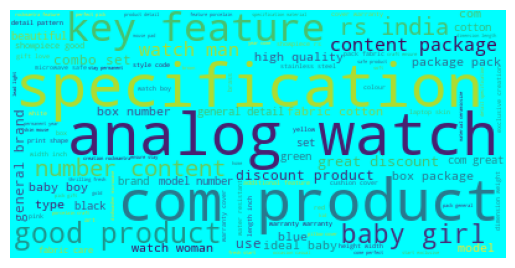

In [152]:
import pickle 
with open('data/cleaned/description_cleaned_spacy.pkl', 'rb') as f1:
    df = pickle.load(f1)

text = df.description_clean.apply(lambda x: ' '.join(x))
    
with open('data/cleaned/stop_words.pkl', 'rb') as f:
    stop_words = pickle.load(f) 
    # deserialize using load()

wordcloud = WordCloud(background_color = 'cyan', stopwords = stop_words, max_words = 100)\
.generate(' '.join(text) )
plt.imshow(wordcloud)
plt.axis("off")
plt.show();

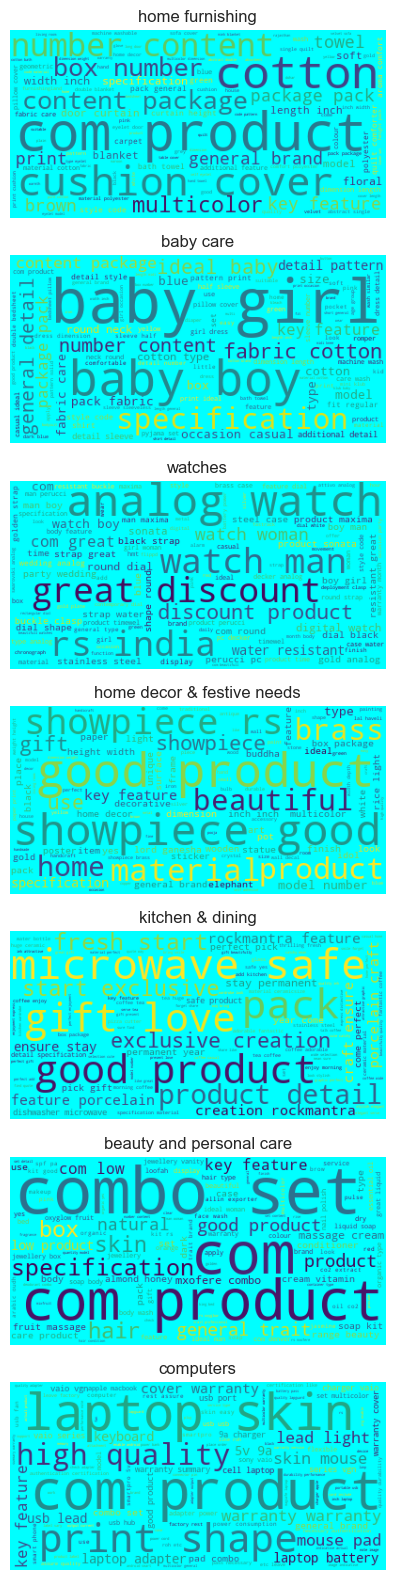

In [153]:
import pickle 
with open('data/cleaned/description_cleaned_spacy.pkl', 'rb') as f1:
    df = pickle.load(f1)
    
with open('data/cleaned/stop_words.pkl', 'rb') as f:
    stop_words = pickle.load(f) 
    # deserialize using load()

fig,axes = plt.subplots(7, 1, figsize=(20,20))
fax = axes.ravel()

for i,c in enumerate(df.cat_1.unique()):
    text = df.description_clean[df.cat_1==c].apply(lambda x: ' '.join(x))
    wordcloud = WordCloud(background_color = 'cyan', stopwords = stop_words, max_words = 100)\
    .generate(' '.join(text) )
    
    fax[i].set_title(c)
    fax[i].imshow(wordcloud)

    fax[i].axis("off")


plt.show();

# <a name="C5"><font color='grey'>**Partie 5 : Exploratory Data Analysis**</font></a> 

### <a name="C51"><font color='grey'>5.1 Etude par catégory </font></a> 

In [13]:
df.head()

,uniq_id,image,description,description_clean,cat_1
0,55b85ea15a1536d46b7190ad6fff8ce7,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Key Features of Elegance Polyester Multicolor ...,"[key, elegance, polyester, multicolor, abstrac...",home furnishing
1,7b72c92c2f6c40268628ec5f14c6d590,7b72c92c2f6c40268628ec5f14c6d590.jpg,Specifications of Sathiyas Cotton Bath Towel (...,"[cotton, bath, towel, bath, towel, red, yellow...",baby care
2,64d5d4a258243731dc7bbb1eef49ad74,64d5d4a258243731dc7bbb1eef49ad74.jpg,Key Features of Eurospa Cotton Terry Face Towe...,"[key, cotton, terry, face, towel, set, size, s...",baby care
3,d4684dcdc759dd9cdf41504698d737d8,d4684dcdc759dd9cdf41504698d737d8.jpg,Key Features of SANTOSH ROYAL FASHION Cotton P...,"[key, royal, fashion, cotton, printed, king, s...",home furnishing
4,6325b6870c54cd47be6ebfbffa620ec7,6325b6870c54cd47be6ebfbffa620ec7.jpg,Key Features of Jaipur Print Cotton Floral Kin...,"[key, print, cotton, floral, king, sized, doub...",home furnishing


cat_1
baby care                     42.753333
beauty and personal care      22.026667
computers                     35.006667
home decor & festive needs    38.166667
home furnishing               29.140000
kitchen & dining              45.420000
watches                       14.766667
Name: Nbre_token, dtype: float64


<Axes: xlabel='cat_1'>

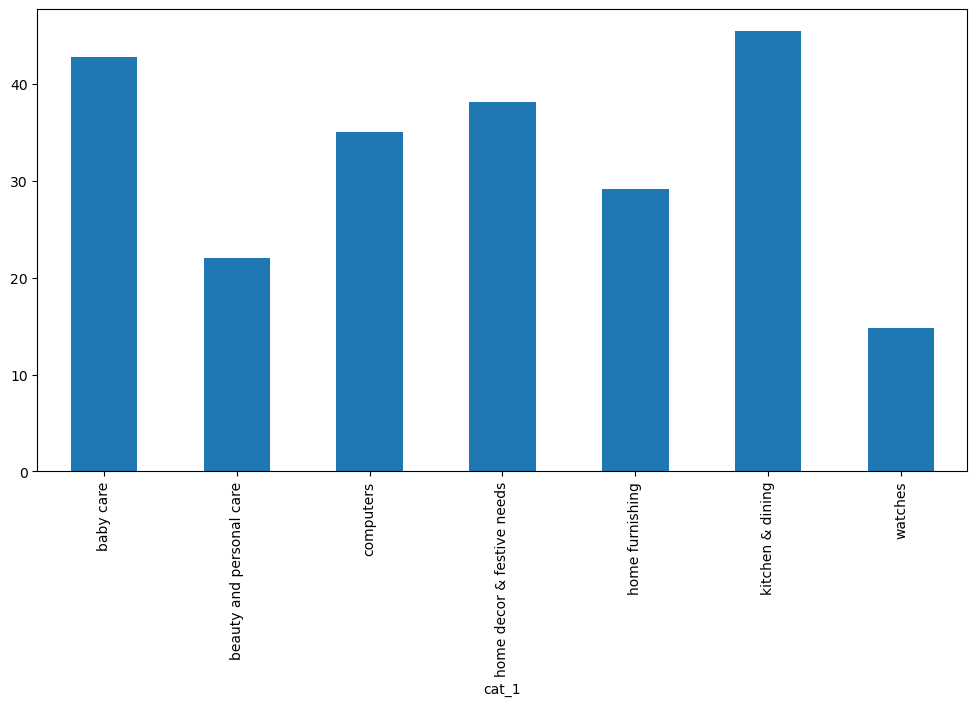

In [35]:
df['Nbre_token'] = df.description_clean.apply(len)

print( df.groupby(by=['cat_1']).Nbre_token.mean()) 

fig, axes = plt.subplots(nrows=1, ncols=1,  figsize=(12, 6))
(df.groupby(by=['cat_1'])\
.Nbre_token.mean()).plot(kind='bar',ax = axes)

### <a name="C52"><font color='grey'>4.3 Drop useless columns</font></a> 

### <a name="C53"><font color='grey'>4.4 Export csv</font></a> 

</br>

_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-

</br>

</br>

</br>

</br>